<a href="https://colab.research.google.com/github/mukvnd/StrokePredictor/blob/main/StrokePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.metrics import MeanIoU
from sklearn.impute import KNNImputer
df = pd.read_csv('/content/stroke prediction dataset.csv', header = 0)

In [ ]:
df.head(30)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df = df.drop(columns = 'id')

In [ ]:
num_ft = []
cat_ft = []
for i in df.columns:
  if i!='stroke':
    if df[i].dtype!='int64' and df[i].dtype!='float64':
      cat_ft.append(i)
    else:
      num_ft.append(i)
cat_ft.append('hypertension')
cat_ft.append('heart_disease')
num_ft.remove('hypertension')
num_ft.remove('heart_disease')
print('categorical',cat_ft)
print('numerical',num_ft)

categorical ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']
numerical ['age', 'avg_glucose_level', 'bmi']


In [ ]:
for i in cat_ft:
  print(i , df[i].unique())

gender ['Male' 'Female' 'Other']
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
hypertension [0 1]
heart_disease [1 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_ft:
  df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
temp_ft = ['stroke']
for i in num_ft:
  temp_ft.append(i)
df[temp_ft].corr()

,stroke,age,avg_glucose_level,bmi
stroke,1.000000,0.245257,0.131945,0.042374
age,0.245257,1.000000,0.238171,0.333398
avg_glucose_level,0.131945,0.238171,1.000000,0.175502
bmi,0.042374,0.333398,0.175502,1.000000


In [ ]:
X = df.drop(columns = 'stroke')
y  = df['stroke']

In [ ]:
df = df.sample(frac=1, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

testx = df.drop(columns = 'stroke')
testy = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(testx,testy, test_size=0.2, random_state=42)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

0    3890
1     198
Name: stroke, dtype: int64
0    971
1     51
Name: stroke, dtype: int64


In [ ]:
198/(3890+198)

0.048434442270058706

In [ ]:
51/(51+971)

0.049902152641878667

training




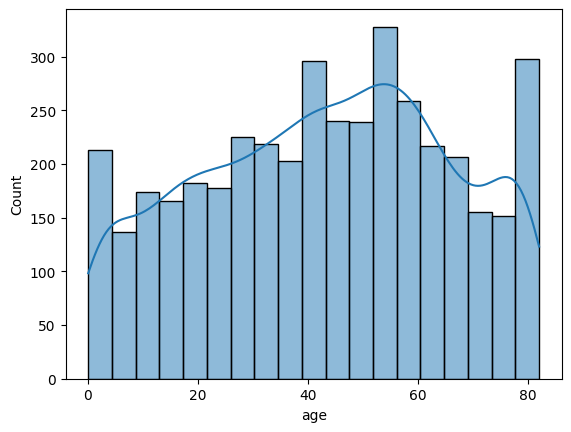

training




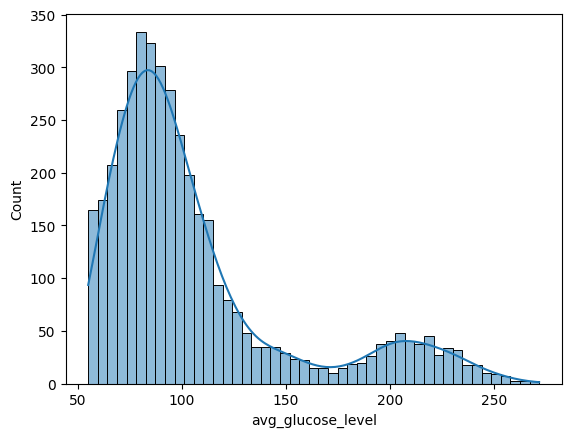

training




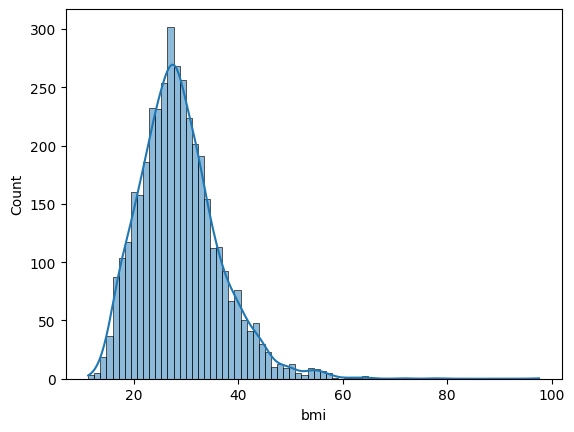

testing




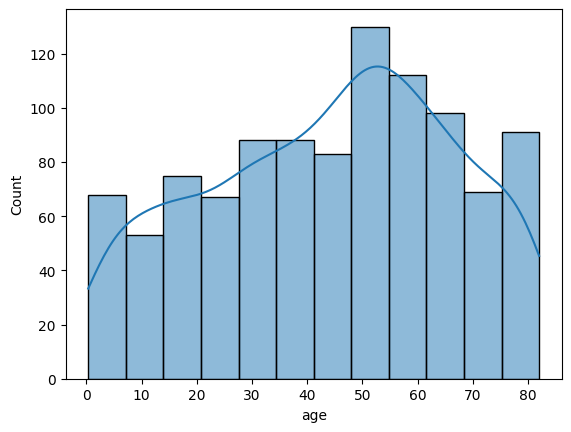

testing




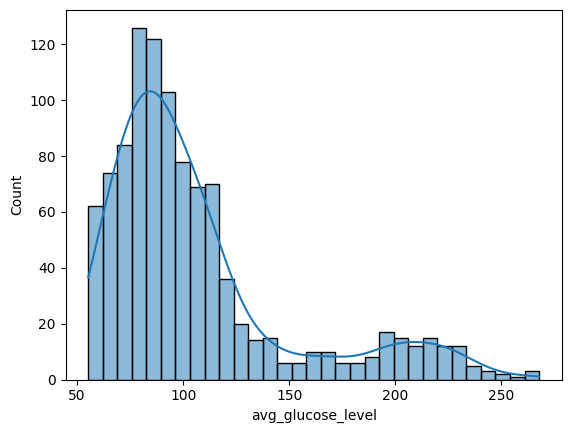

testing




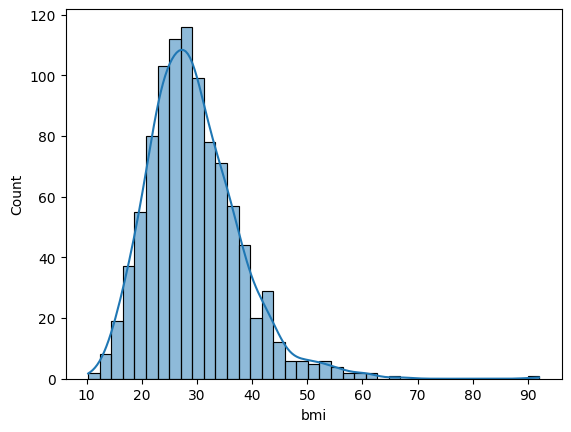

In [ ]:
for i in num_ft:
  print("training\n\n")
  sns.histplot(X_train[i], kde = True)
  plt.show()
for i in num_ft:
  print("testing\n\n")
  sns.histplot(X_test[i], kde = True)
  plt.show()

training




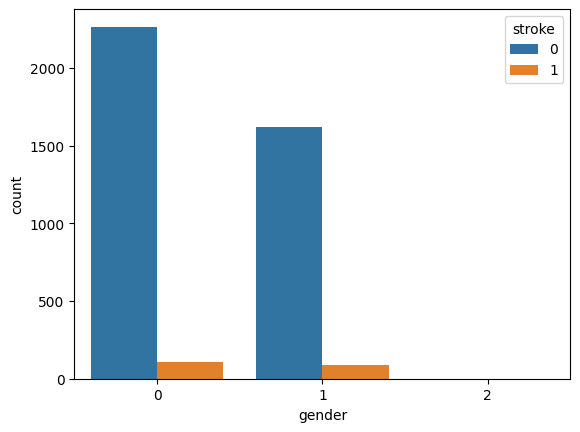

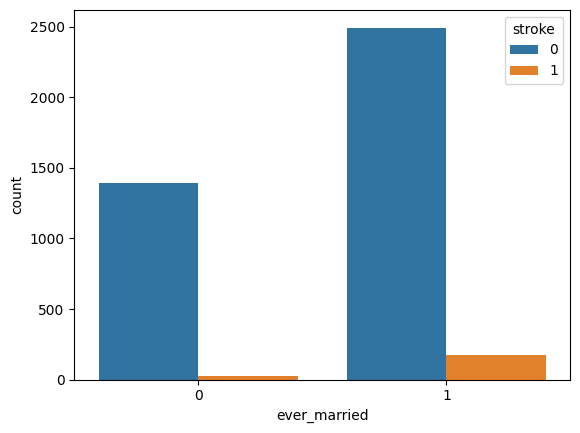

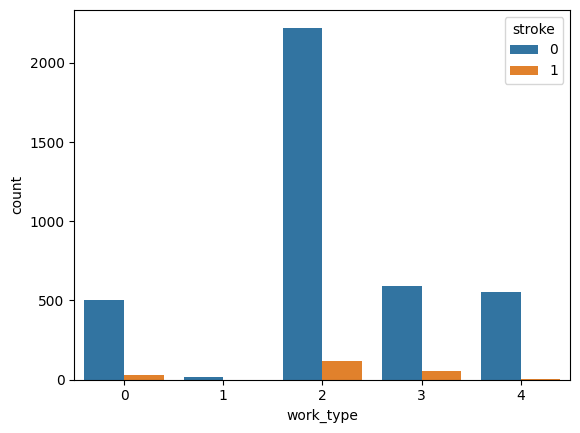

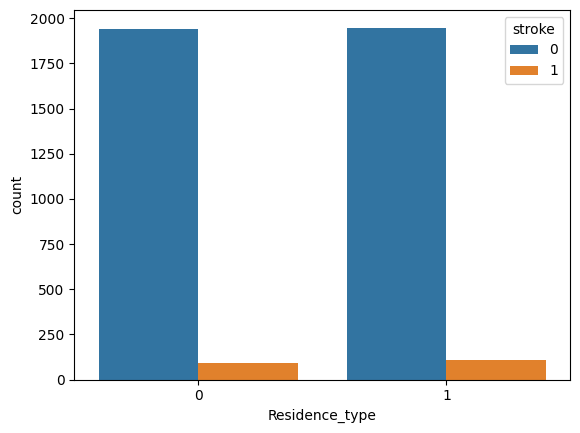

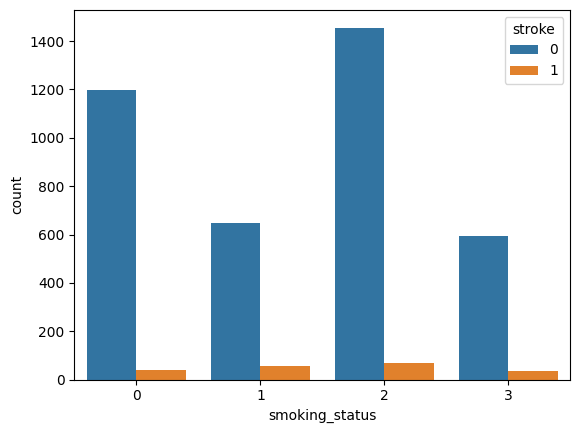

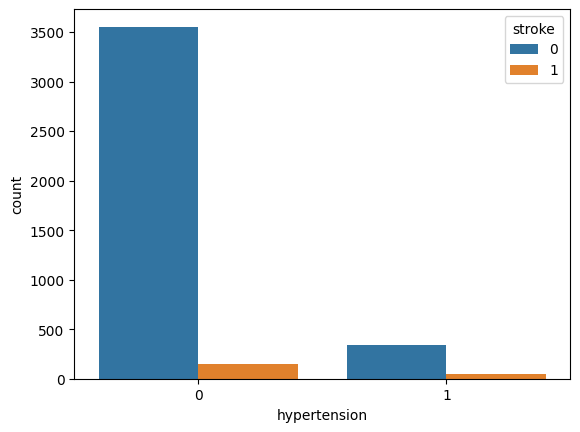

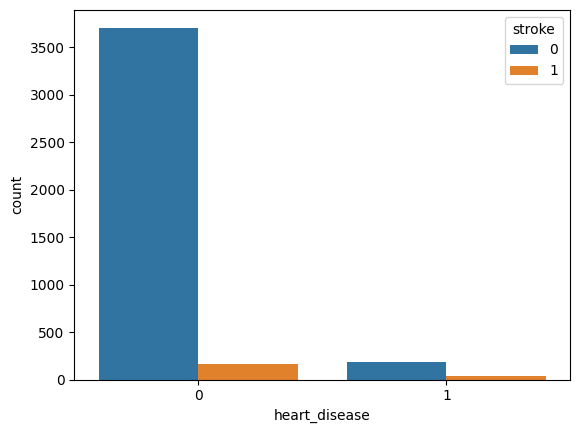

testing




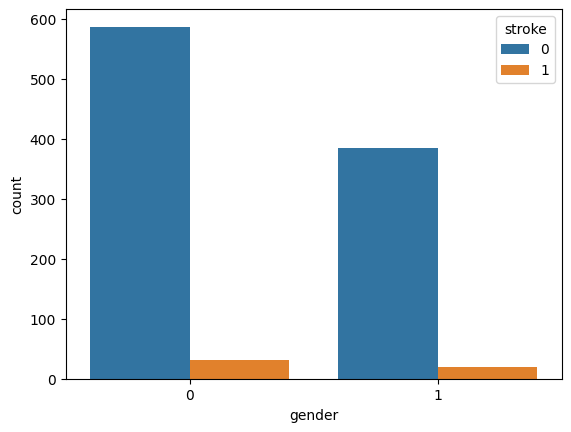

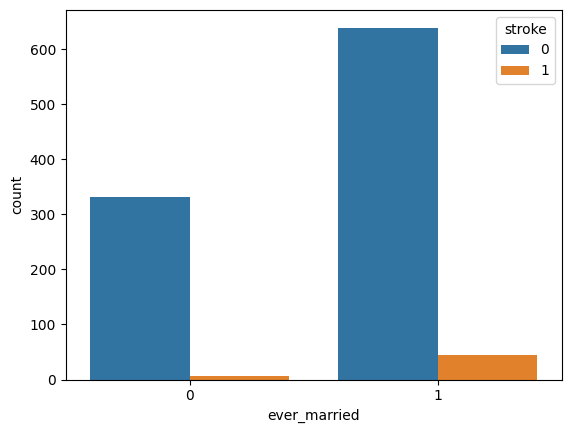

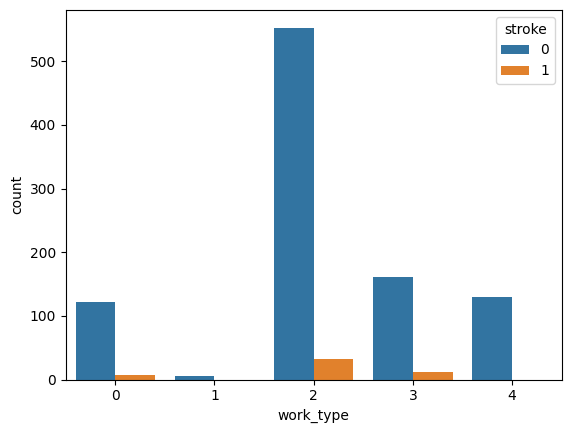

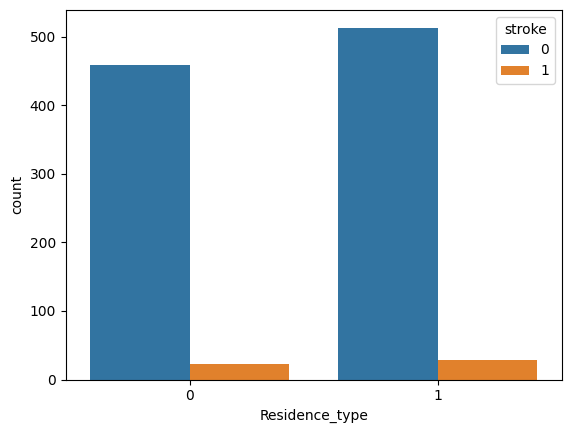

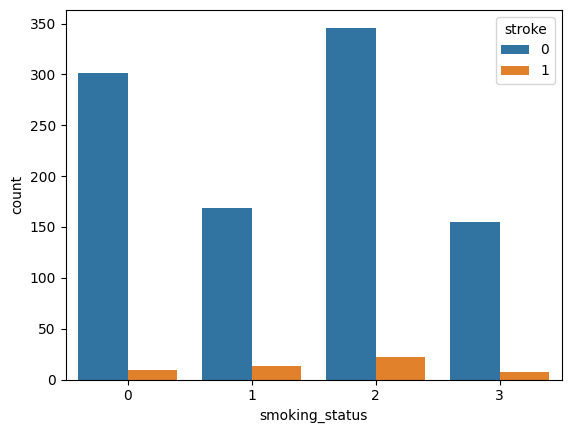

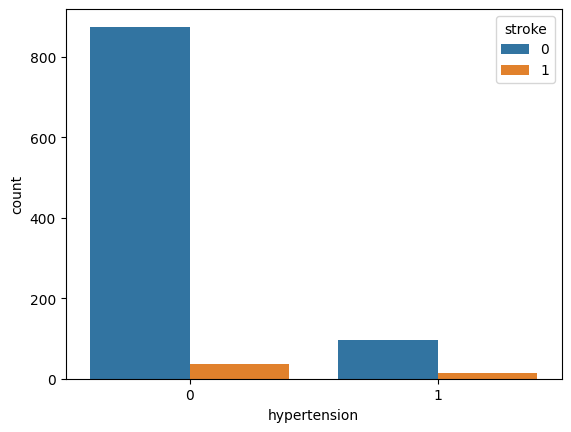

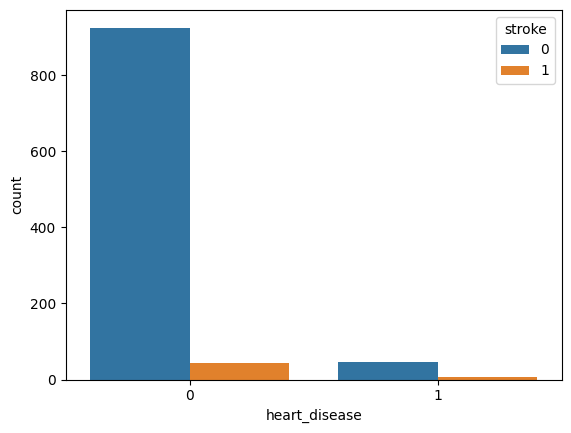

In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

print("training\n\n")
for i in cat_ft:
  sns.countplot(data = train_data, x = i, hue = 'stroke')
  plt.show()

print("testing\n\n")
for i in cat_ft:
  sns.countplot(data = test_data, x = i, hue = 'stroke')
  plt.show()

In [ ]:
# df.isna().sum()
print(X_train.isna().sum())
print(X_test.isna().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  156
smoking_status         0
dtype: int64
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  45
smoking_status        0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5, weights='distance')
X_imputed_train = pd.DataFrame(imputer.fit_transform(X_train[['bmi']]), columns=['bmi'], index=X_train.index)
X_imputed_test = pd.DataFrame(imputer.fit_transform(X_test[['bmi']]), columns=['bmi'], index=X_test.index)


X_train = X_train.assign(bmi=X_imputed_train['bmi'])
X_test = X_test.assign(bmi=X_imputed_test['bmi'])

In [ ]:
print(X_train.isna().sum())
print(X_test.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


In [ ]:
duplicatedrows1 = X_train.duplicated().sum()
duplicatedrows2 = X_test.duplicated().sum()
print(duplicatedrows1, duplicatedrows2)

0 0


In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis = 1)

In [ ]:
temp_num = ['stroke']
temp_cat = ['stroke']

for i in num_ft:
  temp_num.append(i)
for i in cat_ft:
  temp_cat.append(i)

print("using test data numerical features")


from scipy.stats import chi2_contingency


chi2_results_train = {}
chi2_results_test = {}


for feature in cat_ft:
    contingency_table = pd.crosstab(train_data[feature], train_data['stroke'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results_train[feature] = {'chi2': chi2, 'p-value': p_value, 'dof': dof}

print("training data results -: ")
print(train_data[temp_num].corr()['stroke'])
print()

for feature, result in chi2_results_train.items():
    print(f'\nFeature: {feature}\n')
    print(f'Chi-square statistic: {result["chi2"]:.2f}')
    print(f'p-value: {result["p-value"]:.2f}')
    print(f'Degrees of freedom: {result["dof"]}')


for feature in cat_ft:
    contingency_table = pd.crosstab(test_data[feature], test_data['stroke'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results_test[feature] = {'chi2': chi2, 'p-value': p_value, 'dof': dof}


print("test data results -: ")
print(test_data[temp_num].corr()['stroke'])
print()
for feature, result in chi2_results_test.items():
    print(f'\nFeature: {feature}\n')
    print(f'Chi-square statistic: {result["chi2"]:.2f}')
    print(f'p-value: {result["p-value"]:.2f}')
    print(f'Degrees of freedom: {result["dof"]}')


using test data numerical features
training data results -: 
stroke               1.000000
age                  0.241290
avg_glucose_level    0.123397
bmi                  0.043604
Name: stroke, dtype: float64


Feature: gender

Chi-square statistic: 0.85
p-value: 0.65
Degrees of freedom: 2

Feature: ever_married

Chi-square statistic: 49.96
p-value: 0.00
Degrees of freedom: 1

Feature: work_type

Chi-square statistic: 41.13
p-value: 0.00
Degrees of freedom: 4

Feature: Residence_type

Chi-square statistic: 0.77
p-value: 0.38
Degrees of freedom: 1

Feature: smoking_status

Chi-square statistic: 25.81
p-value: 0.00
Degrees of freedom: 3

Feature: hypertension

Chi-square statistic: 62.45
p-value: 0.00
Degrees of freedom: 1

Feature: heart_disease

Chi-square statistic: 79.57
p-value: 0.00
Degrees of freedom: 1
test data results -: 
stroke               1.000000
age                  0.261198
avg_glucose_level    0.166766
bmi                  0.021956
Name: stroke, dtype: float64


Featur

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, make_scorer, f1_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


X = X_train
y = y_train

catboost_params = {'depth': [4, 6, 8],
                   'learning_rate': [0.01, 0.05, 0.1],
                   'l2_leaf_reg': [1, 3, 5, 7, 9, 11, 13]}

lgbm_params = {'num_leaves': [20, 40, 60],
               'learning_rate': [0.01, 0.05, 0.1],
               'reg_alpha': [0.1, 0.5, 1],
               'reg_lambda': [0.1, 0.5, 1]}

xgb_params = {'max_depth': [4, 6, 8],
              'learning_rate': [0.01, 0.05, 0.1],
              'reg_alpha': [0.1, 0.5, 1],
              'reg_lambda': [0.1, 0.5, 1]}

rf_params = {'n_estimators': [50, 100, 200],
             'max_depth': [4, 6, 8, 10, 12],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

kmeans_params = {'n_clusters': [2, 3, 4, 5, 6]}

scoring = {
    'roc_auc_recall': make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True),
    'f1': make_scorer(f1_score),
}


catboost_cv = RandomizedSearchCV(CatBoostClassifier(),
                                 param_distributions=catboost_params,
                                 n_iter=10,
                                 cv=StratifiedKFold(n_splits=7, shuffle=True, random_state=42),
                                 scoring=scoring,
                                 refit='roc_auc_recall')

lgbm_cv = RandomizedSearchCV(LGBMClassifier(),
                             param_distributions=lgbm_params,
                             n_iter=10,
                             cv=StratifiedKFold(n_splits=7, shuffle=True, random_state=42),
                             scoring=scoring,
                             refit='roc_auc_recall')

xgb_cv = RandomizedSearchCV(XGBClassifier(),
                            param_distributions=xgb_params,
                            n_iter=10,
                            cv=StratifiedKFold(n_splits=7, shuffle=True, random_state=42),
                            scoring=scoring,
                            refit='roc_auc_recall')

rf_cv = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_params,
                           n_iter=10,
                           cv=StratifiedKFold(n_splits=7, shuffle=True, random_state=42),
                           scoring=scoring,
                           refit='roc_auc_recall')

kmeans_cv = RandomizedSearchCV(KMeans(),
                               param_distributions=kmeans_params,
                               n_iter=10,
                               cv=StratifiedKFold(n_splits=7, shuffle=True, random_state=42),
                               scoring=scoring,
                               refit = False)


catboost_cv.fit(X, y)
best_catboost = catboost_cv.best_estimator_

lgbm_cv.fit(X, y)
best_lgbm = lgbm_cv.best_estimator_

xgb_cv.fit(X, y)
best_xgb = xgb_cv.best_estimator_

rf_cv.fit(X, y)
best_rf = rf_cv.best_estimator_

kmeans_cv.fit(X, y)
best_kmeans = kmeans_cv.best_estimator_

print("Best hyperparameters for CatBoost:", catboost_cv.best_params_)
print("Best hyperparameters for LightGBM:", lgbm_cv.best_params_)
print("Best hyperparameters for XGBoost:", xgb_cv.best_params_)
print("Best hyperparameters for Random Forest:", rf_cv.best_params_)
print("Best hyperparameters for KMeans:", kmeans_cv.best_params_)


best_models = [best_catboost, best_lgbm, best_xgb, best_rf, best_kmeans]
model_names = ['CatBoost', 'LightGBM', 'XGBoost', 'Random Forest', 'Kmeans']

for i, model in enumerate(best_models):
  y_pred = model.predict_proba(X)[:, 1]
  score = roc_auc_score(y, y_pred)
  print("ROC AUC score with recall for {}: {:.4f}".format(model_names[i], score))

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6154951	total: 3.14ms	remaining: 3.14s
1:	learn: 0.5495646	total: 11.3ms	remaining: 5.65s
2:	learn: 0.4895187	total: 18.7ms	remaining: 6.2s
3:	learn: 0.4434580	total: 21.6ms	remaining: 5.37s
4:	learn: 0.4021243	total: 26.1ms	remaining: 5.2s
5:	learn: 0.3720060	total: 27.5ms	remaining: 4.55s
6:	learn: 0.3450480	total: 29ms	remaining: 4.11s
7:	learn: 0.3232959	total: 32ms	remaining: 3.97s
8:	learn: 0.3010124	total: 39.6ms	remaining: 4.36s
9:	learn: 0.2826232	total: 41.4ms	remaining: 4.1s
10:	learn: 0.2675957	total: 48.9ms	remaining: 4.4s
11:	learn: 0.2523824	total: 51.2ms	remaining: 4.21s
12:	learn: 0.2427926	total: 52.5ms	remaining: 3.98s
13:	learn: 0.2309603	total: 60ms	remaining: 4.23s
14:	learn: 0.2221804	total: 63ms	remaining: 4.14s
15:	learn: 0.2122504	total: 64.9ms	remaining: 3.99s
16:	learn: 0.2041222	total: 74ms	remaining: 4.28s
17:	learn: 0.1995323	total: 75.8ms	remaining: 4.13s
18:	learn: 0.1928198	total: 83.3ms	re

ValueError: ignored

In [ ]:
print("Best hyperparameters for CatBoost:", catboost_cv.best_params_)
print("Best hyperparameters for LightGBM:", lgbm_cv.best_params_)
print("Best hyperparameters for XGBoost:", xgb_cv.best_params_)
print("Best hyperparameters for Random Forest:", rf_cv.best_params_)

best_models = [best_catboost, best_lgbm, best_xgb, best_rf]
model_names = ['CatBoost', 'LightGBM', 'XGBoost', 'Random Forest']

for i, model in enumerate(best_models):
  y_pred = model.predict_proba(X)[:, 1]
  score = roc_auc_score(y, y_pred)
  print("ROC AUC score with recall for {}: {:.4f}".format(model_names[i], score))

Best hyperparameters for CatBoost: {'learning_rate': 0.01, 'l2_leaf_reg': 9, 'depth': 4}
Best hyperparameters for LightGBM: {'reg_lambda': 1, 'reg_alpha': 0.5, 'num_leaves': 20, 'learning_rate': 0.01}
Best hyperparameters for XGBoost: {'reg_lambda': 0.1, 'reg_alpha': 1, 'max_depth': 4, 'learning_rate': 0.05}
Best hyperparameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6}
ROC AUC score with recall for CatBoost: 0.9104
ROC AUC score with recall for LightGBM: 0.9084
ROC AUC score with recall for XGBoost: 0.9101
ROC AUC score with recall for Random Forest: 0.9252


In [ ]:
model = RandomForestClassifier(n_estimators = 300, 
                               min_samples_split = 10,
                               min_samples_leaf= 4, 
                               max_depth= 6)
model1= 'reg_lambda': 1, 'reg_alpha': 0.5, 'num_leaves': 20, 'learning_rate': 0.01
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
y_pred[y_pred==1]

array([], dtype=int64)

In [ ]:
y_test[y_test==1]

242    1
171    1
32     1
167    1
243    1
122    1
36     1
41     1
14     1
172    1
219    1
223    1
218    1
31     1
166    1
3      1
57     1
222    1
233    1
180    1
89     1
183    1
208    1
154    1
196    1
113    1
142    1
55     1
119    1
227    1
121    1
231    1
143    1
102    1
10     1
114    1
246    1
44     1
5      1
65     1
68     1
37     1
206    1
8      1
91     1
135    1
202    1
46     1
78     1
147    1
165    1
Name: stroke, dtype: int64

In [ ]:
model = model.fit(X,y)

In [ ]:
int_features = [67,0,1,4,543.2,36.6,3,1,0,1]
features = [np.array(int_features)]
final = pd.DataFrame(columns = ['age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'gender', 'ever_married',
       'Residence_type'])
len(final.columns)

15

In [ ]:
final

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban


In [ ]:
model.predict(final)

array([1])

In [ ]:
with open('/Volumes/mukund 1tb/StrokePredictor/models1', 'wb') as f:
    pickle.dump(model, f)